In [11]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib
import os
import random
import json

In [12]:
os.chdir("/home/bartek/ETH/CS4NLP/project/free-form-VQA/code")
from vqa import VQA

In [13]:
train_imgs_path = "/home/bartek/ETH/CS4NLP/project/train2014"
val_imgs_path = "/home/bartek/ETH/CS4NLP/project/val2014"
random.seed(2137)
pathlib.Path.cwd()

PosixPath('/home/bartek/ETH/CS4NLP/project/free-form-VQA/code')

## Training dataset

In [14]:
dataDir = "/home/bartek/ETH/CS4NLP/project/coco/PythonAPI"
dataType='train2014'
# annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [15]:
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)
img_ids = coco_caps.getImgIds()

loading annotations into memory...
Done (t=0.52s)
creating index...
index created!


In [16]:
coco_caps.loadImgs(img_ids[np.random.randint(0,len(img_ids))])[0]

{'license': 3,
 'file_name': 'COCO_train2014_000000506066.jpg',
 'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000506066.jpg',
 'height': 640,
 'width': 480,
 'date_captured': '2013-11-18 10:05:46',
 'flickr_url': 'http://farm6.staticflickr.com/5100/5427769651_4226e3ddec_z.jpg',
 'id': 506066}

In [17]:
image_ids_subsample = random.sample(img_ids,int(0.05*len(img_ids)))
len(image_ids_subsample)

4139

In [18]:
i=0
annIds = coco_caps.getAnnIds(imgIds=image_ids_subsample[i])
print(img_ids[0])
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

57870
a sheep and two babies in the grass

A is sheep grazing and her lambs are resting.
A mother animal and her babies eating grass.
A sheep grazing next to her baby sheep in a green grass covered field.
Three lambs, one adult and two smalls ones on a green pasture.


In [19]:
vqa = VQA(annotation_file= "../data/v2_mscoco_train2014_annotations.json", question_file="../data/v2_OpenEnded_mscoco_train2014_questions.json")
vqa_val = VQA(annotation_file= "../data/v2_mscoco_val2014_annotations.json", question_file="../data/v2_OpenEnded_mscoco_val2014_questions.json")

q_ids_train = vqa.getImgIds()
q_ids_val = vqa_val.getImgIds()
q_ids_all = q_ids_train+q_ids_val

loading VQA annotations and questions into memory...
0:00:06.324631
creating index...
index created!
loading VQA annotations and questions into memory...
0:00:01.778774
creating index...
index created!


In [20]:
max(q_ids_all)

581929

In [22]:
# question_ids = [299334,299335, 299336]
questions_set = ["What can be seen in this image?", "What is in this image?", "What this image depicts?"]

# assert question_ids not in q_ids_all

q_id = max(q_ids_all)

annotations = []
questions = []

for i in range(len(image_ids_subsample)):
    question_idx = random.randint(0,2) #or deterministic?
    annIds = coco_caps.getAnnIds(imgIds=image_ids_subsample[i])
    anns = coco_caps.loadAnns(annIds)
#     print(anns)
    capt = [an["caption"] for an in anns]
    annot = {"question_type": "describe image","answers": capt,"image_id": image_ids_subsample[i],
             "answer_type": "caption", "question_id": q_id}
    annotations.append(annot)
    q_item = {"question_id" : q_id, "image_id": image_ids_subsample[i], 
              "question" : questions_set[question_idx]}
    questions.append(q_item)
    q_id+=1
    
next_qid = q_id+1

# annotations

In [23]:
with open("annotations_training.json", "w") as f:
    json.dump({"annotations": annotations}, f )
    
with open("questions_training.json", "w") as q:
    json.dump({"questions": questions}, q)


## Validation dataset

In [24]:
dataDir = "/home/bartek/ETH/CS4NLP/project/coco/PythonAPI"
dataType='val2014'
# annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [25]:
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)
img_ids = coco_caps.getImgIds()
image_ids_subsample = random.sample(img_ids,int(0.05*len(img_ids)))
len(image_ids_subsample)

loading annotations into memory...
Done (t=0.25s)
creating index...
index created!


2025

In [26]:
question_ids = [299334,299335, 299336]
questions_set = ["What can be seen in this image?", "What is in this image?", "What this image depicts?"]

assert question_ids not in q_ids_all

annotations = []
questions = []

for i in range(len(image_ids_subsample)):
    question_idx = random.randint(0,2) #or deterministic?
    annIds = coco_caps.getAnnIds(imgIds=image_ids_subsample[i])
    anns = coco_caps.loadAnns(annIds)
#     print(anns)
    capt = [an["caption"] for an in anns]
    annot = {"question_type": "describe image","answers": capt,"image_id": image_ids_subsample[i],
             "answer_type": "caption", "question_id": next_qid}
    annotations.append(annot)
    q_item = {"question_id" : next_qid, "image_id": image_ids_subsample[i], 
              "question" : questions_set[question_idx]}
    questions.append(q_item)
    next_qid+=1

In [27]:
with open("annotations_validation.json", "w") as f:
    json.dump({"annotations": annotations}, f )
    
with open("questions_validation.json", "w") as q:
    json.dump({"questions": questions}, q)


## VQA tool

In [21]:
ids = vqa.getImgIds()
annIds = vqa.getQuesIds(imgIds=random.sample(ids,5))
anns = vqa.loadQA(annIds)
randomAnn = random.choice(anns)
vqa.showQA([randomAnn])
imgId = randomAnn['image_id']

Question: How many towels are in this room?
Answer 1: 9
Answer 2: 9
Answer 3: 6
Answer 4: 0
Answer 5: 9
Answer 6: 8
Answer 7: 0
Answer 8: 9
Answer 9: 6
Answer 10: 8


In [40]:
# vqa.loadQA(annIds)

In [41]:
imgId

184263

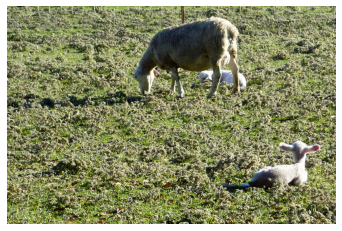

In [65]:
I = io.imread(train_imgs_path + "/COCO_train2014_"+str(imgId).zfill(12)+".jpg")
plt.imshow(I)
plt.axis('off')
plt.show()

In [63]:
image_id = 125567
for i, question in enumerate(questions):
    if question["image_id"] == image_id:
        print(question)
        print(annotations[i])
        

{'question_id': 299334, 'image_id': 125567, 'question': 'What can be seen in this image?'}
{'question_type': 'describe image', 'answers': ['a sheep and two babies in the grass\n', 'A is sheep grazing and her lambs are resting.', 'A mother animal and her babies eating grass.', 'A sheep grazing next to her baby sheep in a green grass covered field.', 'Three lambs, one adult and two smalls ones on a green pasture.'], 'image_id': 125567, 'answer_type': 'caption', 'question_id': 299334}


In [66]:
print(train_imgs_path + "/COCO_train2014_"+str(image_id).zfill(12)+".jpg")
val_imgs_path + "/COCO_val2014_"+str(image_id).zfill(12)+".jpg"

/home/bartek/ETH/CS4NLP/project/train2014/COCO_train2014_000000125567.jpg


'/home/bartek/ETH/CS4NLP/project/val2014/COCO_val2014_000000125567.jpg'

In [19]:
# question = "What can be seen in this image?"

# "annotations": [{"question_type": "describe image", "multiple_choice_answer": "down", "answers": [], "image_id": 262148, "answer_type": "caption", "question_id": question_id}]
# annotation{
# "question_id" : int,
# "image_id" : int,
# "question_type" : str,
# "answer_type" : str,
# "answers" : [answer],
# "multiple_choice_answer" : str
# }